# <B>KINGS COUNTY HOUSING DATA SET

<B>Questions:</B>
<br><li>does having a waterfront contribute to higher price?
<br><li>does grade have an effect on the housing price?
<br><li>is there multicollinearity between the features?
<br><li>what are the main factors that influence the price?
<br><li>how can the final model be improved further?

# CHECKING THE DATASET

<B>Importing necessary packages:

In [1940]:
#importing necessary packages
import numpy as np
from scipy import stats 
import math
import pylab as py 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from itertools import combinations, product
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<b>Surpressing the scientific notation:

In [1941]:
#surpresses scientific notation
pd.options.display.float_format = '{:.2f}'.format

<B>Importing and checking the dataset:

In [1942]:
#importing the dataset
df=pd.read_csv('kc_house_data.csv')

#checking through the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


# CLEANING THE DATASET

<b>Looking through the dataset:

In [1943]:
#checking the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [1944]:
#dropping the unnessecary columns
df.drop(['date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'], axis=1, inplace=True)

In [1945]:
#displaying the dataset with the changes made
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.00,3,1.00,1180,5650,1.00,nan,3,7,1955
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0.00,3,7,1951
2,5631500400,180000.00,2,1.00,770,10000,1.00,0.00,3,6,1933
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1965
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,1987


In [1946]:
#checking the shape
df.shape

(21597, 11)

In [1947]:
#checking the info of the data and the types of each of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
id             21597 non-null int64
price          21597 non-null float64
bedrooms       21597 non-null int64
bathrooms      21597 non-null float64
sqft_living    21597 non-null int64
sqft_lot       21597 non-null int64
floors         21597 non-null float64
waterfront     19221 non-null float64
condition      21597 non-null int64
grade          21597 non-null int64
yr_built       21597 non-null int64
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [1948]:
#checking the statistical data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,3.41,7.66,1971.00
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.65,1.17,29.38
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,1900.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,3.00,7.00,1951.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1975.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,4.00,8.00,1997.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,13.00,2015.00


<B>FINDING NAN VALUES

In [1949]:
#detecting nan values in dataframe
df.isna().values.any()

True

In [1950]:
#locating where the nan values exist and the amount of nan values for each columns
df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

<b>DEALING WITH NAN VALUES

In [1951]:
#waterfront has 2376 nan values
#checking all unique values for waterfront
#according to the column descriptions for this data set a house can have a waterfront (1) or not (0)
df.waterfront.unique()

array([nan,  0.,  1.])

In [1952]:
#from checking the unique values in waterfront it indicates that value 1 shows houses to have a waterfront or no waterfront with value 0
#seeing that there are nan values we can make the assumption that  there is no waterfront and therefore we can replace these nan values with 0
#indicating that there is no waterfront

In [1953]:
df["waterfront"] = df["waterfront"].fillna(0.0)

In [1954]:
df.waterfront.unique()

array([0., 1.])

<B>DEALING WITH OULIERS AND EXTREME VALUES

In [1955]:
#checking the statistical data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,3.41,7.66,1971.00
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.08,0.65,1.17,29.38
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,1900.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,3.00,7.00,1951.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1975.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,4.00,8.00,1997.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,13.00,2015.00


In [1956]:
df[df['sqft_lot']==1651359.00]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1717,1020069017,700000.00,4,1.00,1300,1651359,1.00,0.00,4,6,1920


In [1957]:
#from this table it can be seen that the max value for bedrooms is 33 

In [1958]:
#checking the row that has 33 bedrooms
df[df['bedrooms']==33]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15856,2402100895,640000.00,33,1.75,1620,6000,1.00,0.00,5,7,1947


In [1959]:
#dropping the row with 33 bedrooms as it does not make sense for this house to have 33 bedrooms according to the other features in this house such as sqft_living and the amount of floors
df.drop(df.index[15856],inplace=True)

In [1960]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.00,3,1.00,1180,5650,1.00,0.00,3,7,1955
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0.00,3,7,1951
2,5631500400,180000.00,2,1.00,770,10000,1.00,0.00,3,6,1933
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1965
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.00,3,2.50,1530,1131,3.00,0.00,3,8,2009
21593,6600060120,400000.00,4,2.50,2310,5813,2.00,0.00,3,8,2014
21594,1523300141,402101.00,2,0.75,1020,1350,2.00,0.00,3,7,2009
21595,291310100,400000.00,3,2.50,1600,2388,2.00,0.00,3,8,2004


In [1961]:
df[df['grade']==10]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
66,3394100030,975000.00,4,2.50,2720,11049,2.00,0.00,3,10,1989
75,3276920270,832500.00,4,4.00,3430,35102,2.00,0.00,4,10,1986
79,1531000030,720000.00,4,2.50,3450,39683,2.00,0.00,3,10,2002
91,5036300431,1100000.00,5,2.75,3520,6353,2.00,0.00,4,10,2001
108,1853000400,680000.00,4,2.50,3140,28037,2.00,0.00,4,10,1991
...,...,...,...,...,...,...,...,...,...,...,...
21552,524059330,1700000.00,4,3.50,3830,8963,2.00,0.00,3,10,2014
21557,8562790760,785000.00,4,3.50,3070,4684,2.00,0.00,3,10,2009
21560,9253900271,3570000.00,5,4.50,4850,10584,2.00,1.00,3,10,2007
21577,8672200110,1090000.00,5,3.75,4170,8142,2.00,0.00,3,10,2006


<B>CHECKING FOR DUPLICATES

In [1962]:
#checking if there are any duplicate values
df.duplicated().any()

True

In [1965]:
#finding amount of duolicate ids
df.id.duplicated().sum()

177

In [1966]:
#displaying all duplicate entries
df[df['id'].duplicated() == True].sort_values('id')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
2495,1000102,300000.00,6,3.00,2400,9373,2.00,0.00,3,7,1991
16801,7200179,175000.00,2,1.00,840,12750,1.00,0.00,3,6,1925
11422,109200390,250000.00,3,1.75,1480,3900,1.00,0.00,4,7,1980
12406,123039336,244900.00,1,1.00,620,8261,1.00,0.00,3,5,1939
7786,251300110,358000.00,3,2.25,2510,12013,2.00,0.00,3,8,1988
...,...,...,...,...,...,...,...,...,...,...,...
2492,9407110710,322000.00,3,1.75,1510,8400,1.00,0.00,2,7,1979
4918,9809000020,1940000.00,5,2.25,3120,16672,2.00,0.00,4,9,1969
6340,9828200460,430000.00,2,1.00,700,4800,1.00,0.00,3,7,1922
15186,9834200305,615000.00,3,1.00,1790,3876,1.50,0.00,5,7,1904


In [1967]:
#looking at one of the duplicate entries
df[df['id'] == 9834200305]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15185,9834200305,350000.00,3,1.00,1790,3876,1.50,0.00,5,7,1904
15186,9834200305,615000.00,3,1.00,1790,3876,1.50,0.00,5,7,1904


In [1968]:
#looking at this it appears that such duplicate entries indicate that the house has been sold more than once

In [1969]:
#removing all the duplicate ids and keeping the second one
df.drop_duplicates(subset='id', keep="last", inplace=True)

In [1970]:
#checking if d
df.duplicated(subset = ['id']).sum()

0

In [1971]:
df[df['id'] == 9834200305]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
15186,9834200305,615000.00,3,1.00,1790,3876,1.50,0.00,5,7,1904


In [1972]:
df.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [1973]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

<B>Identifying categorical variables:

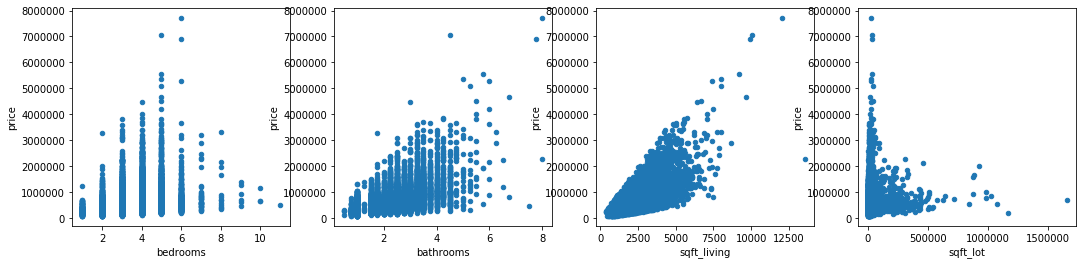

In [1974]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,4))
for xcol, ax in zip(df[['bedrooms','bathrooms','sqft_living','sqft_lot']], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax)

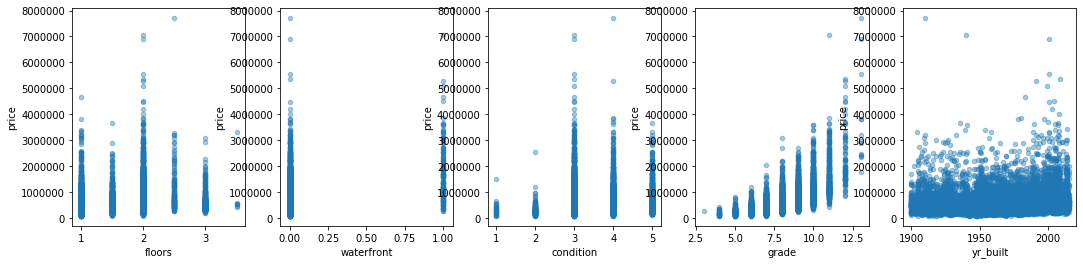

In [1975]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18,4))
for xcol, ax in zip(df[['floors','waterfront','condition','grade','yr_built']], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4)

From these graphs we can identify the categorical variables with the scatterplots that have verticle lines. The categorical variables are bedrooms, bathrooms, floors, waterfront, condition and grade.

<b>Assigning dummy variables:

In [1976]:
#assiging dummy variables
cond_df = pd.get_dummies(df['condition'], prefix='cond', drop_first=True, dtype=float)

In [1977]:
#combining the inital data frame to the data frame with the condition dummy variables
df = pd.concat([df,cond_df], axis=1)

In [1978]:
#displaying the data frame to check the changes that have been made
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,cond_2,cond_3,cond_4,cond_5
0,7129300520,221900.00,3,1.00,1180,5650,1.00,0.00,3,7,1955,0.00,1.00,0.00,0.00
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0.00,3,7,1951,0.00,1.00,0.00,0.00
2,5631500400,180000.00,2,1.00,770,10000,1.00,0.00,3,6,1933,0.00,1.00,0.00,0.00
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1965,0.00,0.00,0.00,1.00
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,1987,0.00,1.00,0.00,0.00


<b>Checking distribution of features:

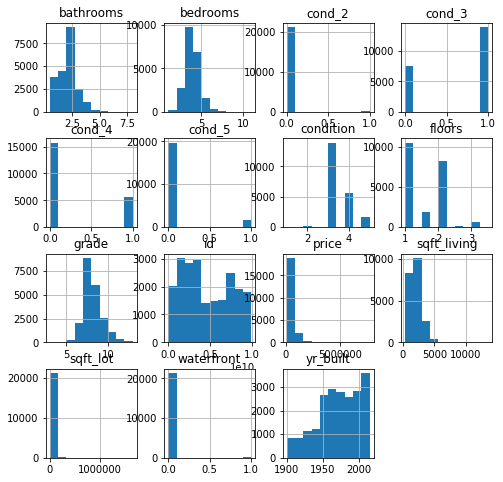

In [1979]:
#looking at the distribution of features
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax);

Text(0.5, 1.0, 'Average Price of houses based on if they have waterfronts')

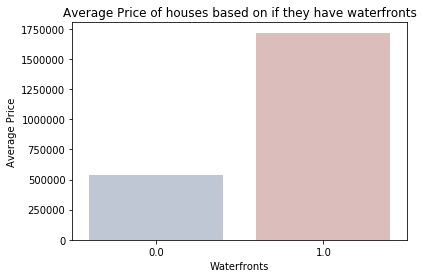

In [1980]:
#graphing the average price of houses based on if they have waterfronts
type_list=list(df.waterfront.unique())
average_price2=[]

for i in type_list:
    x=df[df.waterfront==i]
    average_price2.append(sum(x.price)/len(x))
df2=pd.DataFrame({'type_list':type_list,'average_price':average_price2})

plt.figure()
ax=sns.barplot(x=df2.type_list,y=df2.average_price,palette='vlag')
plt.xlabel('Waterfronts')
plt.ylabel('Average Price')
plt.title('Average Price of houses based on if they have waterfronts')

In [1981]:
#checking unique variables of grade
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

In [1982]:
#values range from 3-13 for grade

In [1983]:
df.groupby(['grade'])['price'].mean()

grade
3     262000.00
4     212001.85
5     250454.28
6     304245.27
7     403628.22
8     543384.70
9     773644.04
10   1072192.06
11   1499210.00
12   2213806.82
13   3710769.23
Name: price, dtype: float64

Text(0.5, 0, 'Grade')

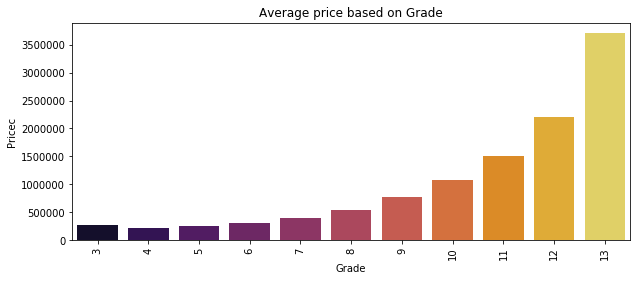

In [1984]:
#average price based on grade
fig,ax = plt.subplots(1,1,figsize=(10,4))

cnt = df.groupby(['grade'])['price'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y = cnt['price'], x = cnt.index, palette= 'inferno')
ax.set_title('Average price based on Grade')
ax.set_ylabel('Pricec')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('Grade')

# TRAIN/TEST SPLIT

<b>Initally splitting the predictors and target variables from each other:

In [1985]:
#pre-processing
#creating dataframe with all the predictor variables
X = df.drop('price',axis=1)

#creating a dataframe with all the target variables
y = df['price']
y = pd.DataFrame(y)

In [1986]:
# check X and Y shape
print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (21419, 14)
y Shape: (21419, 1)


In [1987]:
base_reg = LinearRegression().fit(X, y)
base_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1988]:
X.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,cond_2,cond_3,cond_4,cond_5
id,1.00,0.00,0.00,-0.01,-0.13,0.02,-0.00,-0.02,0.01,0.02,-0.01,0.03,-0.03,-0.01
bedrooms,0.00,1.00,0.53,0.59,0.03,0.18,-0.00,0.02,0.37,0.16,-0.05,0.01,-0.01,0.02
bathrooms,0.00,0.53,1.00,0.76,0.09,0.50,0.06,-0.13,0.67,0.51,-0.07,0.19,-0.17,-0.04
sqft_living,-0.01,0.59,0.76,1.00,0.17,0.35,0.10,-0.06,0.76,0.32,-0.06,0.10,-0.08,-0.02
sqft_lot,-0.13,0.03,0.09,0.17,1.00,-0.01,0.02,-0.01,0.11,0.05,0.04,-0.01,0.01,-0.01
floors,0.02,0.18,0.50,0.35,-0.01,1.00,0.02,-0.27,0.46,0.49,-0.05,0.32,-0.26,-0.12
waterfront,-0.00,-0.00,0.06,0.10,0.02,0.02,1.00,0.02,0.08,-0.02,-0.00,-0.02,0.01,0.01
condition,-0.02,0.02,-0.13,-0.06,-0.01,-0.27,0.02,1.00,-0.15,-0.37,-0.19,-0.86,0.54,0.71
grade,0.01,0.37,0.67,0.76,0.11,0.46,0.08,-0.15,1.00,0.45,-0.08,0.20,-0.14,-0.09
yr_built,0.02,0.16,0.51,0.32,0.05,0.49,-0.02,-0.37,0.45,1.00,-0.07,0.39,-0.26,-0.25


<B>Preforming the train/test split:

In [1989]:
#splitting the data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.80)
# Scaling the data
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1990]:
# check the shape
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (17135, 14)
X_test Shape: (4284, 14)
y_train Shape: (17135, 1)
y_test Shape: (4284, 1)


# IDENTIFYING THE PREDICTOR VARIABLES

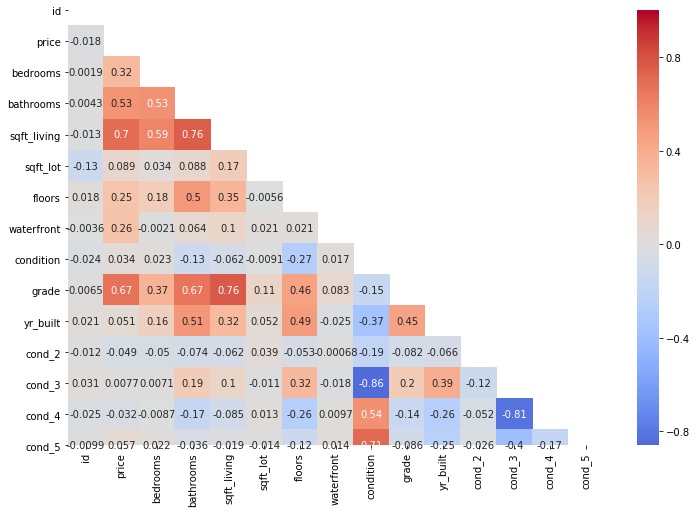

In [1991]:
#correlation heatmap
plt.figure(figsize=(12,8))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True,center= 0, cmap= 'coolwarm',mask=matrix)

Our target variable is price, so according to this correlation heatmap, we can see that the highest correlating variable to price is sqft_living (0.7), followed by grade (0.67) and bathrooms (0.53).

# INITIAL REGRESSION MODEL

Running the inital regerssion model with all of the predictor variables

In [1992]:
# Setting up the LEARNER
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)

# Actually LEARNING
results = model.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.65
const         6572882.60
id                 -0.00
bedrooms       -47297.19
bathrooms       50838.19
sqft_living       181.32
sqft_lot           -0.29
floors          18089.28
waterfront     722962.56
condition      223474.80
grade          132074.39
yr_built        -3870.86
cond_2        -206172.99
cond_3        -434430.58
cond_4        -645570.25
cond_5        -834415.73
dtype: float64


In [1993]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2395.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:50:42   Log-Likelihood:            -2.3520e+05
No. Observations:               17135   AIC:                         4.704e+05
Df Residuals:                   17121   BIC:                         4.705e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.573e+06   1.52e+05     43.385      0.000    6.28e+06    6.87e+06
id          -2.031e-06   5.95e-07     -3.411      0.001    -3.2e-06   -8.64e-07
bedrooms     -4.73e+04   2436.832    -19.409      0.000   -5.21e+04   -4.25e+04
bathrooms    5.084e+04   3948.410     12.876      0.000    4.31e+04    5.86e+04
sqft_living   181.3219      3.770     48.097      0.000     173.933     188.711
sqft_lot       -0.2875      0.044     -6.483      0.000      -0.374      -0.201
floors       1.809e+04   3936.252      4.596      0.000    1.04e+04    2.58e+04
waterfront    7.23e+05   2.07e+04     34.964      0.000    6.82e+05    7.63e+05
condition    2.235e+05   1.39e+04     16.049      0.000    1.96e+05    2.51e+05
grade        1.321e+05   2447.544     53.962      0.000    1.27e+05    1.37e+05
yr_built    -3870.8568     76.587    -50.542      0.000   -4020.975   -3720.738
cond_2      -2.062e+05   3.84e+04     -5.366      0.000   -2.81e+05   -1.31e+05
cond_3      -4.344e+05   2.18e+04    -19.929      0.000   -4.77e+05   -3.92e+05
cond_4      -6.456e+05   1.56e+04    -41.501      0.000   -6.76e+05   -6.15e+05
cond_5      -8.344e+05   2.03e+04    -41.044      0.000   -8.74e+05   -7.95e+05
==============================================================================
Omnibus:                    13385.528   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1006968.380
Skew:                           3.187   Prob(JB):                         0.00
Kurtosis:                      40.010   Cond. No.                     2.76e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.54e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1994]:
#displaying the p-values of the model
results.pvalues

const         0.00
id            0.00
bedrooms      0.00
bathrooms     0.00
sqft_living   0.00
sqft_lot      0.00
floors        0.00
waterfront    0.00
condition     0.00
grade         0.00
yr_built      0.00
cond_2        0.00
cond_3        0.00
cond_4        0.00
cond_5        0.00
dtype: float64

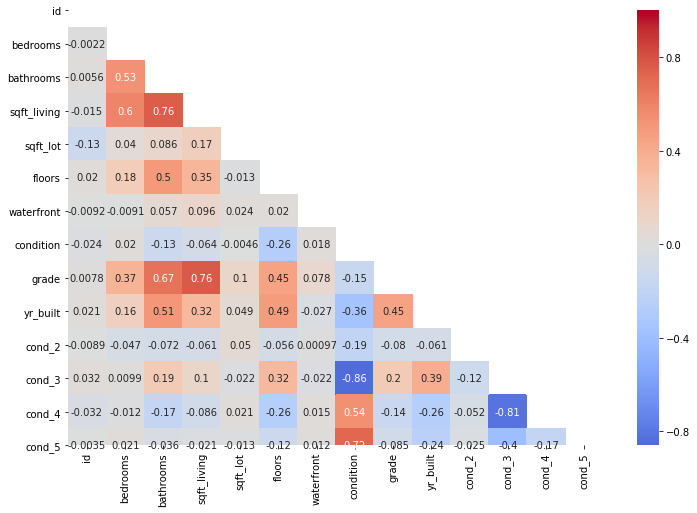

In [1995]:
#correlation heatmap with predictor variables to check if they correlate with each other
plt.figure(figsize=(12,8))
matrix = np.triu(X_train.corr())
sns.heatmap(X_train.corr(), annot = True,center= 0, cmap= 'coolwarm',mask=matrix)

From these heatmaps we can see that there is moderate and high correlations between multiple variables:
<li>price and sqft_living at 0.7
<li>price and grade at 0.67
<li>price and bathrooms at 0.53
<li>price and bedrooms at 0.32
<li>price and waterfront at 0.26

In [1996]:
#checking the correlation between my selected predictor and target variables
df[['price','grade','sqft_living','bathrooms','bedrooms','waterfront']].corr()

,price,grade,sqft_living,bathrooms,bedrooms,waterfront
price,1.00,0.67,0.70,0.53,0.32,0.26
grade,0.67,1.00,0.76,0.67,0.37,0.08
sqft_living,0.70,0.76,1.00,0.76,0.59,0.10
bathrooms,0.53,0.67,0.76,1.00,0.53,0.06
bedrooms,0.32,0.37,0.59,0.53,1.00,-0.00
waterfront,0.26,0.08,0.10,0.06,-0.00,1.00


Text(0.5, 1.0, 'Price distribution')

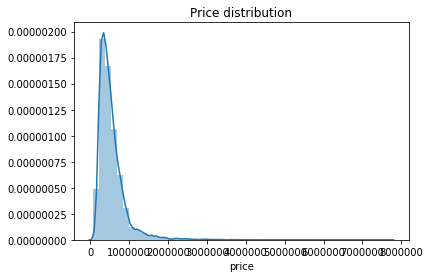

In [1997]:
#checking the distribution on price
sns.distplot(df['price']).set_title("Price distribution")

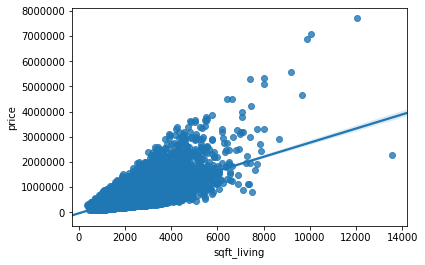

In [1998]:
#plotting sqft_living against price
sns.regplot(df['sqft_living'], df['price'])

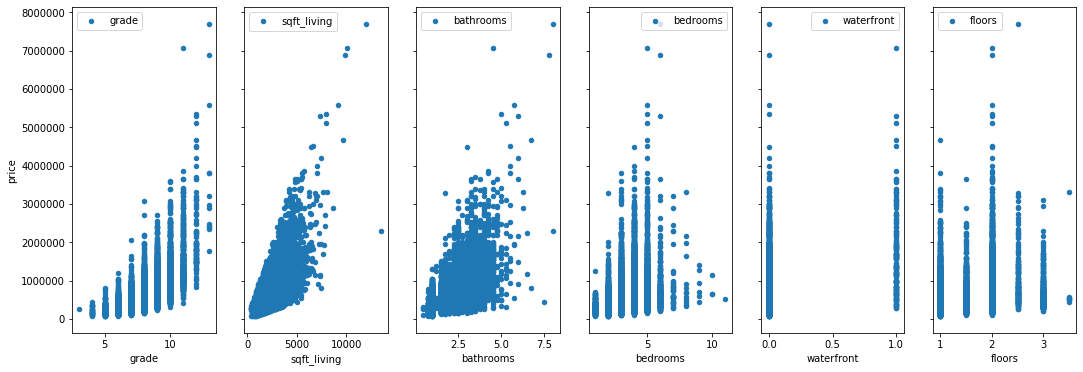

In [1999]:
# visualize the relationship between the preditors and the target using scatterplots
fig, axs = plt.subplots(1, 6, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['grade','sqft_living','bathrooms','bedrooms','waterfront','floors']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

Id will be removed as a predictor as it is not statistically relevant.

From this initial baseline model we can see that there are multiple negative coefficients indicating that there is a negative relation ship between those predictors and the target variable. Where for example a one unit increase in yr_built will lead to a -$431.24 reduction in the price whilst the other variables are held constant.

id, bedrooms, sqft lot, and year built will all be removed 

# REMOVING UNNESSARY FEATURES

In [2000]:
#removing all the columns that gave a negative coefficient
X_train.drop(['id','bedrooms','sqft_lot','yr_built'], axis=1, inplace=True)
X_test.drop(['id','bedrooms','sqft_lot','yr_built'], axis=1, inplace=True)

In [2001]:
#displaying X_train first 5 rows
X_train.head()

,bathrooms,sqft_living,floors,waterfront,condition,grade,cond_2,cond_3,cond_4,cond_5
10643,2.75,1465,2.00,0.00,3,7,0.00,1.00,0.00,0.00
16293,2.50,1520,2.00,0.00,3,7,0.00,1.00,0.00,0.00
15429,1.75,1960,1.00,0.00,4,7,0.00,0.00,1.00,0.00
17294,2.50,2070,1.00,0.00,3,8,0.00,1.00,0.00,0.00
124,2.25,2910,2.00,0.00,3,9,0.00,1.00,0.00,0.00


<b>Running the model again with the selected features:

In [2002]:
# Setting up the LEARNER
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)

# Actually LEARNING
results = model.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.58
const         -572805.74
bathrooms      -24349.09
sqft_living       182.95
floors         -19753.42
waterfront     813341.01
condition      -25566.02
grade          118256.24
cond_2         -26165.83
cond_3         -44310.95
cond_4          32308.87
cond_5         141275.21
dtype: float64


In [2003]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2676.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:50:55   Log-Likelihood:            -2.3656e+05
No. Observations:               17135   AIC:                         4.731e+05
Df Residuals:                   17125   BIC:                         4.732e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.728e+05   6.49e+04     -8.820      0.000      -7e+05   -4.46e+05
bathrooms   -2.435e+04   3970.317     -6.133      0.000   -3.21e+04   -1.66e+04
sqft_living   182.9532      3.667     49.893      0.000     175.766     190.141
floors      -1.975e+04   4155.549     -4.754      0.000   -2.79e+04   -1.16e+04
waterfront   8.133e+05   2.23e+04     36.532      0.000     7.7e+05    8.57e+05
condition   -2.557e+04   1.41e+04     -1.807      0.071   -5.33e+04    2161.350
grade        1.183e+05   2559.436     46.204      0.000    1.13e+05    1.23e+05
cond_2      -2.617e+04   4.14e+04     -0.632      0.527   -1.07e+05    5.49e+04
cond_3      -4.431e+04   2.21e+04     -2.004      0.045   -8.76e+04    -979.129
cond_4       3.231e+04   8864.624      3.645      0.000    1.49e+04    4.97e+04
cond_5       1.413e+05   7983.332     17.696      0.000    1.26e+05    1.57e+05
==============================================================================
Omnibus:                    13377.675   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           932723.914
Skew:                           3.211   Prob(JB):                         0.00
Kurtosis:                      38.569   Cond. No.                     3.00e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.89e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [2004]:
#displaying the p-values
results.pvalues

const         0.00
bathrooms     0.00
sqft_living   0.00
floors        0.00
waterfront    0.00
condition     0.07
grade         0.00
cond_2        0.53
cond_3        0.05
cond_4        0.00
cond_5        0.00
dtype: float64

P-values greater than 0.05 can be considered statistically unsignificant, and therefore such variables can be removed from the model. Condition and cond_2 can be removed as they have p-values greater than 0.05, indicating that it is not statistically significant.

<b>Checking normality assumption:

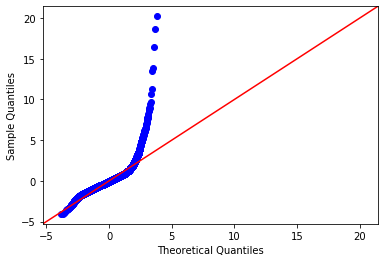

In [2005]:
#plotting the residuls to check if they are normally distributed
fig = sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True)

<B>Homoscedacity assumption:

# IS THERE MULTICOLINEARITY BETWEEN FEATURES?

<b>Checking for multicollinearity between variables

In [2006]:
#running variance inflation factor test to multicollinearity with features
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
list(zip(X_train, vif))

[('bathrooms', 2.799093510390388),
 ('sqft_living', 3.4172127858400523),
 ('floors', 1.503575069168936),
 ('waterfront', 1.011483534528844),
 ('condition', 9481.01255676461),
 ('grade', 2.711364012584726),
 ('cond_2', 23.516035785768874),
 ('cond_3', 4448.0857364088415),
 ('cond_4', 3200.9158984259902),
 ('cond_5', 1529.4163943378276)]

Values of greater than 10 in the VIF test generally indicate multicollinearity and therefore can be removed from the model. As we can see here values exceed 10 with condition, cond_2, cond_3, cond_4, and cond_5.


In [2007]:
#removing all the columns that gave a vif of over 10
X_train.drop(['condition','cond_2','cond_3','cond_4','cond_5'], axis=1, inplace=True)
X_test.drop(['condition','cond_2','cond_3','cond_4','cond_5'], axis=1, inplace=True)

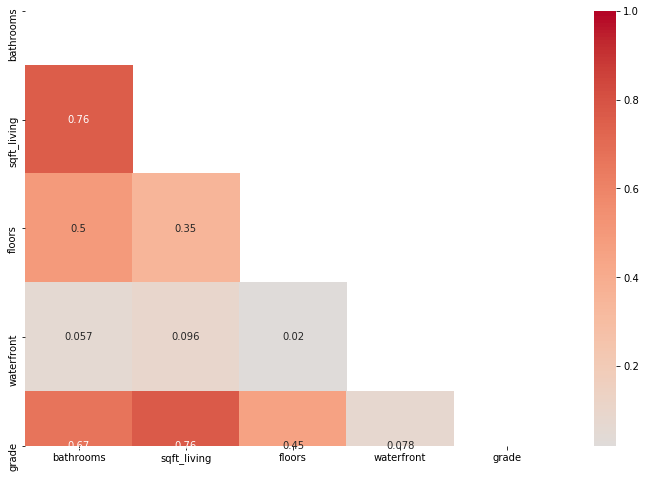

In [2008]:
#correlation heatmap with predictor variables to check if they correlate with each other
plt.figure(figsize=(12,8))
matrix = np.triu(X_train.corr())
sns.heatmap(X_train.corr(), annot = True,center= 0, cmap= 'coolwarm',mask=matrix)

We can see from this heatmap that there is collinearity between sqft_living and bathrooms, and due to their collinear relationship they will be removed as a variable in the regression model. There is also multicollinearity between sqft_living and bedrooms.

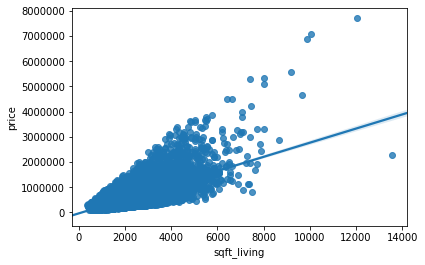

In [2009]:
sns.regplot(df['sqft_living'], df['price'])

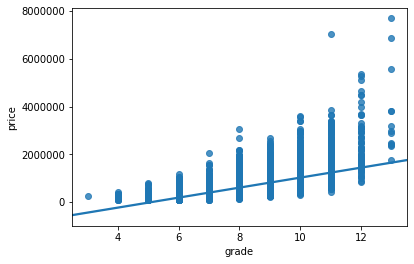

In [2010]:
sns.regplot(df['grade'], df['price'])

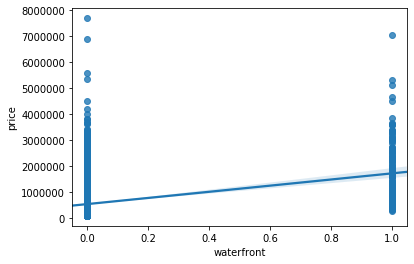

In [2011]:
sns.regplot(df['waterfront'], df['price'])

In [2012]:
X_train

,bathrooms,sqft_living,floors,waterfront,grade
10643,2.75,1465,2.00,0.00,7
16293,2.50,1520,2.00,0.00,7
15429,1.75,1960,1.00,0.00,7
17294,2.50,2070,1.00,0.00,8
124,2.25,2910,2.00,0.00,9
...,...,...,...,...,...
11383,2.25,2490,1.00,0.00,8
12069,1.75,2470,1.00,0.00,7
5432,1.00,1260,1.00,0.00,6
868,1.00,1320,1.00,0.00,7


# FINAL MODEL

In [2013]:
#removing all the columns that gave a negative coefficient
X_train.drop(['floors','bathrooms'], axis=1, inplace=True)
X_test.drop(['floors','bathrooms'], axis=1, inplace=True)

In [2014]:
X_train.head()

,sqft_living,waterfront,grade
10643,1465,0.00,7
16293,1520,0.00,7
15429,1960,0.00,7
17294,2070,0.00,8
124,2910,0.00,9


In [2015]:
# Setting up the LEARNER
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)

# Actually LEARNING
results = model.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.57
const         -609632.76
sqft_living       176.07
waterfront     833581.64
grade          101739.70
dtype: float64


In [2016]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     7559.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:51:08   Log-Likelihood:            -2.3686e+05
No. Observations:               17135   AIC:                         4.737e+05
Df Residuals:                   17131   BIC:                         4.738e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.096e+05   1.45e+04    -41.916      0.000   -6.38e+05   -5.81e+05
sqft_living   176.0712      3.127     56.305      0.000     169.942     182.201
waterfront   8.336e+05   2.26e+04     36.837      0.000    7.89e+05    8.78e+05
grade        1.017e+05   2446.416     41.587      0.000    9.69e+04    1.07e+05
==============================================================================
Omnibus:                    13155.643   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           837188.149
Skew:                           3.156   Prob(JB):                         0.00
Kurtosis:                      36.656   Cond. No.                     2.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2017]:
results.pvalues

const         0.00
sqft_living   0.00
waterfront    0.00
grade         0.00
dtype: float64

<B>Checking the normality assumption:

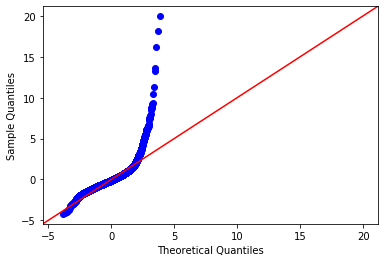

In [2018]:
fig = sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True)

<B>Checking the homoscedasticity assumption:

In [2026]:
# Comment: No improvement observed
plt.scatter(results.resid(X_train[X]), results.resid)
plt.plot(results.resid(X_train[X]), [0 for i in range(len(train))])

ValueError: Must pass DataFrame with boolean values only

# RUNNING REGRESSION ON TEST DATA

In [2020]:
# Setting up the LEARNER
X = sm.add_constant(X_test)
model = sm.OLS(y_test, X)

# Actually LEARNING
results = model.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.58
const         -491775.22
sqft_living       178.43
waterfront     978068.28
grade           85174.73
dtype: float64


In [2021]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     1933.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:51:30   Log-Likelihood:                -58941.
No. Observations:                4284   AIC:                         1.179e+05
Df Residuals:                    4280   BIC:                         1.179e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.918e+05   2.78e+04    -17.675      0.000   -5.46e+05   -4.37e+05
sqft_living   178.4286      5.991     29.783      0.000     166.683     190.174
waterfront   9.781e+05   4.38e+04     22.338      0.000    8.92e+05    1.06e+06
grade        8.517e+04   4686.333     18.175      0.000     7.6e+04    9.44e+04
==============================================================================
Omnibus:                     1741.410   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17353.794
Skew:                           1.659   Prob(JB):                         0.00
Kurtosis:                      12.285   Cond. No.                     2.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

S= sqft_living, W= waterfront, G= grade

price = 178.43S + 978068.28W + 85174.73G - 491775.22

<B>Checking the normality assumption:

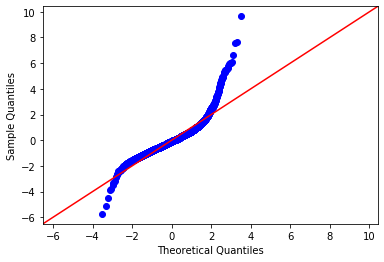

In [2027]:
fig = sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True)

# CONCLUSION

In [ ]:
Future work

In [ ]:
Find a better model for average priced houses

Use the year when the houses were built/renovated to determine if those improve the models

With more data provided from previous/future years of houses sold - make an inflation based model